# 초기 설정
* Package Import
* Drive Mount
* Korean Font

In [1]:
# Load Package
%matplotlib inline  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
# Drive Mount
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [3]:
# 한글 폰트 추가
# (셀 실행 시에도 한글 폰트 적용이 안되는 경우, 상단 탭에서 "런타임-런타임 다시 실행" 후 실행하시기 바랍니다.)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and di

# Data Load

In [4]:
df = pd.read_csv('/content/MyDrive/MyDrive/산학협력프로젝트(산림대 협업)/data4.csv') # 데이터 읽기

In [5]:
df['loc'] = df['sigun'] + '_' + df['myeon'] + '_' + df['region_symbol'] #지역 식별자 생성
df = df.drop('myeon',axis=1) #myeon column 삭제
df = df.drop('region_symbol',axis=1) #regin_symbol column 삭제
df = df.drop('Do',axis=1) #delete Do column
df = df.drop('sigun',axis=1 )#delete sigun column
df = df.drop('ri',axis=1) #delte ri column
result = np.array([[0, 0, 0, 0,'준우세목']]) #dataframe을 합치기 위한 임시 dataframe 생성
count = 0 #error count 변수 생성


# 데이터 전처리
* missing value imputation [[참조](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)] -> IterativeImputer에 대한 설명



In [6]:
# IterativeImputer 모듈이란 np.nan값을 그 열의 평균값으로 채워주는 역할
# IterativeImputer 모듈 불러오기

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [7]:
imp_mean = IterativeImputer(random_state=0)
df.tail()

,x_coordinate_1st,y_coordinate_1st,dbh_3rd,height_3rd,crown_width_leftright_2nd,crown_width_updown_2nd,crown_class_3rd,loc
1935,0.5,12.8,36.4,19.7,9.2,4.7,우세목,양양군_서면_동부05
1936,6.4,14.9,35.6,20.7,4.8,5.0,준우세목,양양군_서면_동부05
1937,8.0,13.4,35.2,21.0,7,5.7,준우세목,양양군_서면_동부05
1938,11.5,12.9,31.4,17.5,7.2,5.9,준우세목,양양군_서면_동부05
1939,7.9,18.4,33.8,19.8,#NAME?,6.0,준우세목,양양군_서면_동부05


In [8]:
# 위의 표에 있는 #NAME?과 아예 비어있는 값들을 replace를 활용하여 np.nan값으로 바꿔줌
for i in df.columns:
  df[i].replace('\xa0 ', np.nan, inplace=True)
  df[i].replace('#NAME?', np.nan, inplace=True)

# 위의 모듈을 사용하여 np.nan의 값을 그 열의 평균값으로 채워주는 코드.
df.iloc[:, 0: 5] = imp_mean.fit_transform(df.iloc[:, 0:5]) 

In [9]:
# 위의 표와 비교하면 #NAME?의 값에서 5.61841의 값으로 바뀌었음을 알 수 있다.
df.tail()

,x_coordinate_1st,y_coordinate_1st,dbh_3rd,height_3rd,crown_width_leftright_2nd,crown_width_updown_2nd,crown_class_3rd,loc
1935,0.5,12.8,36.4,19.7,9.20000,4.7,우세목,양양군_서면_동부05
1936,6.4,14.9,35.6,20.7,4.80000,5.0,준우세목,양양군_서면_동부05
1937,8.0,13.4,35.2,21.0,7.00000,5.7,준우세목,양양군_서면_동부05
1938,11.5,12.9,31.4,17.5,7.20000,5.9,준우세목,양양군_서면_동부05
1939,7.9,18.4,33.8,19.8,5.61841,6.0,준우세목,양양군_서면_동부05


In [10]:
# StandardScaler() 모듈을 통해서 보다 쉽게 정규화를 한다.
# 정규화 식은 (x - mean(평균)) / std(표준편차) 이다.
# 기존에 있던 정규화 부분을 모듈을 사용한 간편하게 바꾸었습니다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   

df_scaler = df
df_scaler = df_scaler.drop('crown_class_3rd',axis=1)
df_scaler = df_scaler.drop('loc',axis=1)
df_scaler = df_scaler.drop('x_coordinate_1st',axis=1)
df_scaler = df_scaler.drop('y_coordinate_1st',axis=1)

df_scaler['height_3rd'] = df_scaler['height_3rd'].astype(float)
df_scaler['crown_width_leftright_2nd'] = df_scaler['crown_width_leftright_2nd'].astype(float)
df_scaler['crown_width_updown_2nd'] = df_scaler['crown_width_updown_2nd'].astype(float)
df_scaler['dbh_3rd'] = df_scaler['dbh_3rd'].astype(float)

df_scaler = scaler.fit_transform(df_scaler)

In [11]:
#dataframe 만들기(열에 이름 부여)
df_sample = pd.DataFrame(df_scaler, columns=['dbh_3rd', 'height_3rd', 'crown_width_leftright_2nd','crown_width_updown_2nd' ] )
df_sample

,dbh_3rd,height_3rd,crown_width_leftright_2nd,crown_width_updown_2nd
0,-0.850117,-0.639185,0.093405,-0.298304
1,0.227577,0.435971,1.677556,0.910202
2,-0.168933,0.071805,0.715750,1.074998
3,-0.168933,-0.014901,0.715750,0.580609
4,-0.158766,-0.101607,3.601167,0.305949
...,...,...,...,...
1935,1.071432,0.349265,2.639361,-0.023643
1936,0.990096,0.522677,0.149982,0.141153
1937,0.949428,0.574701,1.394671,0.525677
1938,0.563085,-0.032242,1.507825,0.635541


In [12]:
# 만든 데이터 프레임에 'crown_class_3rd' 데이터를 넣어주기
df_sample.insert(4, 'crown_class_3rd',df['crown_class_3rd'])
df.sample

<bound method NDFrame.sample of       x_coordinate_1st  y_coordinate_1st  ...  crown_class_3rd          loc
0                  5.6               0.6  ...             준우세목  양구군_남면_북부01
1                 18.9               6.7  ...              우세목  양구군_남면_북부01
2                 12.0               4.8  ...              우세목  양구군_남면_북부01
3                  0.7              12.2  ...             준우세목  양구군_남면_북부01
4                  2.5              10.1  ...             준우세목  양구군_남면_북부01
...                ...               ...  ...              ...          ...
1935               0.5              12.8  ...              우세목  양양군_서면_동부05
1936               6.4              14.9  ...             준우세목  양양군_서면_동부05
1937               8.0              13.4  ...             준우세목  양양군_서면_동부05
1938              11.5              12.9  ...             준우세목  양양군_서면_동부05
1939               7.9              18.4  ...             준우세목  양양군_서면_동부05

[1940 rows x 8 columns]>

In [13]:
#모은 데이터를 dataframe으로 변환
df = pd.DataFrame(df_sample, columns=['dbh_3rd', 'height_3rd', 'crown_width_leftright_2nd','crown_width_updown_2nd', 'crown_class_3rd'])
df

,dbh_3rd,height_3rd,crown_width_leftright_2nd,crown_width_updown_2nd,crown_class_3rd
0,-0.850117,-0.639185,0.093405,-0.298304,준우세목
1,0.227577,0.435971,1.677556,0.910202,우세목
2,-0.168933,0.071805,0.715750,1.074998,우세목
3,-0.168933,-0.014901,0.715750,0.580609,준우세목
4,-0.158766,-0.101607,3.601167,0.305949,준우세목
...,...,...,...,...,...
1935,1.071432,0.349265,2.639361,-0.023643,우세목
1936,0.990096,0.522677,0.149982,0.141153,준우세목
1937,0.949428,0.574701,1.394671,0.525677,준우세목
1938,0.563085,-0.032242,1.507825,0.635541,준우세목


In [14]:
#데이터 형 변환
df['height_3rd'] = df['height_3rd'].astype(float)
df['crown_width_leftright_2nd'] = df['crown_width_leftright_2nd'].astype(float)
df['crown_width_updown_2nd'] = df['crown_width_updown_2nd'].astype(float)
df['dbh_3rd'] = df['dbh_3rd'].astype(float)


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

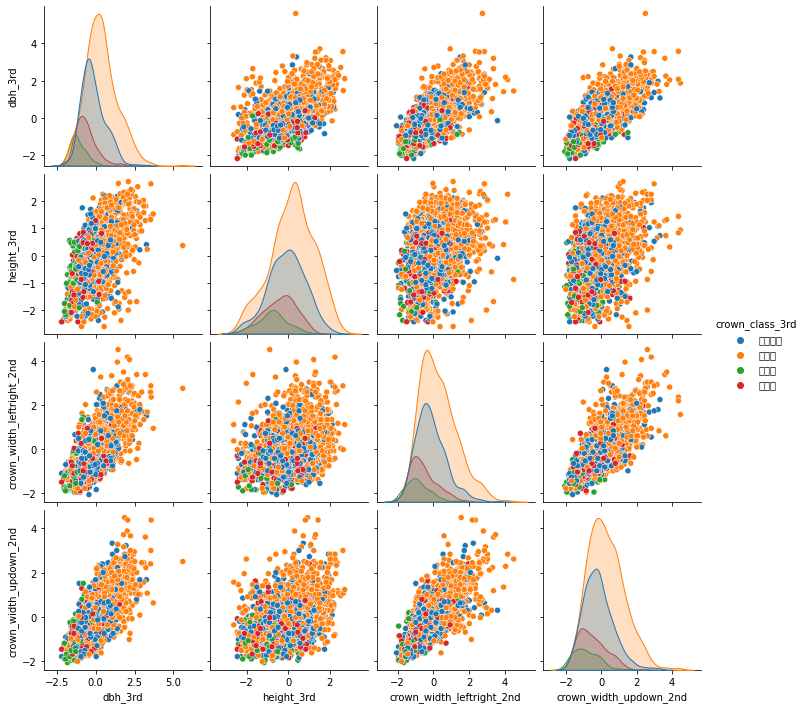

In [15]:
#pairplot 생성 및 이미지화 
sns.pairplot(df, hue='crown_class_3rd')
plt.show()


# Clustering
* k-Means clustering
* 두 변수 추출하여 clustering (실제 이 부분은 크게 유효성 없음 지워주시기 바랍니다.)
* 모든 변수 사용하여 clustering (이 경우, 2D plot으로 visualize는 어려움)
  * clustering 결과와 실제 **정답과의 비교가 필요함** [[참조](https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_performance_evaluation.htm)]

In [16]:
#K-means clustering을 하기 위한 데이터 전처리
df_mod = df.copy()
df = df.drop('crown_class_3rd', axis=1)

#모든변수 다 이용해서 클러스터링
x = np.array(df)


In [17]:
#모든 변수를 이용한 K Means clustring 실행
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(x)

y_predict = model.predict(x)


#clustering 결과와 실제 정답과의 비교(완벽할수록 1에 가까워짐)
adjusted_rand_score(df_mod['crown_class_3rd'], y_predict)

0.027834258966901868

# Classification
* hyperparameter를 [[GridSearchCV](https://teddylee777.github.io/scikit-learn/grid-search-%EB%A1%9C-hyperparameter%EC%B5%9C%EC%A0%81%ED%99%94)]를 활용하여 찾을 수 있도록 함
* classification 성능을 보다 자세하게 제시해 줄 필요가 있음 [[참조](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)]

In [18]:
from sklearn.model_selection import GridSearchCV


# 찾고자하는 파라미터 설정
# n_estimators	
#   - 결정트리의 갯수를 지정
#   - Default = 10
#   - 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음
# max_depth 
#   - 트리의 최대 깊이
#   - default = None
#   → 완벽하게 클래스 값이 결정될 때 까지 분할 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
#   - 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
# max_features
#   - 최적의 분할을 위해 고려할 최대 feature 개수
#   - Default = 'auto' (결정트리에서는 default가 none이었음)
#   - int형으로 지정 →피처 갯수 / float형으로 지정 →비중
#   - sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정
#   - log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정
# min_samples_split 
#   - 노드를 분할하기 위한 최소한의 샘플 데이터수
#   → 과적합을 제어하는데 사용
#   - Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가

param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}

In [19]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier


#평가지표 지정
kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

estimator = RandomForestClassifier()

#grid search 정의
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )


In [20]:
#랜덤포레스트 부분
#grid search 실행


#수관급을 class number로 변환
targets = df_mod['crown_class_3rd'].unique()
map_to_int = {name: n for n, name in enumerate(targets)}
df_mod["Target"] = df_mod['crown_class_3rd'].replace(map_to_int)

#학습 데이터 전처리
x = np.array(df_mod.drop('crown_class_3rd', axis=1).drop('Target', axis=1))
y = np.array(df_mod["Target"])

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

#학습 데이터와 테스트 데이터 나누기(9:1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


# 최적의 파라미터 찾기 실행

grid_search.fit(X_train, y_train) 


# 한번씩 반복될때마다  정확도 등이 출력되도록 설정
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  5.6min finished


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': None, 'max_features': 'auto', 'm...",0.564667,91,0.600000,0.560000,0.571429
1,"{'max_depth': None, 'max_features': 'auto', 'm...",0.565225,89,0.600000,0.565714,0.588571
2,"{'max_depth': None, 'max_features': 'auto', 'm...",0.573251,18,0.605714,0.577143,0.582857
3,"{'max_depth': None, 'max_features': 'auto', 'm...",0.563527,95,0.588571,0.565714,0.582857
4,"{'max_depth': None, 'max_features': 'auto', 'm...",0.574430,7,0.622857,0.565714,0.560000
...,...,...,...,...,...,...
91,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.570989,29,0.622857,0.560000,0.554286
92,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.568128,63,0.617143,0.554286,0.560000
93,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.565836,84,0.611429,0.548571,0.565714
94,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.576138,1,0.622857,0.565714,0.565714


In [21]:
#최적의 파라미터(grid search를 사용하여 찾아낸 최적의 파라미터를 알려줌 )
grid_search.best_params_

{'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_split': 0.1,
 'n_estimators': 200}

In [22]:
# 위의 결과로 인하여 나온 best파라미터들로 설정해서 예측하기

forest = RandomForestClassifier(max_depth = 9, max_features= 'sqrt', min_samples_split = 0.05, n_estimators = 100) # best파라미터 결과로 나온 값들로 설정(위결과)

# 설정된 파라미터로 예측 실행
forest.fit(X_train, y_train)
y_pred = forest.predict(X_train)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_train, y_pred)))


예측 정확도: 0.6254


In [23]:
from sklearn.metrics import classification_report

#준우세목 우세목 피압목 중간목 별로 자세한 예측정확도 등을 알려줌

print(classification_report(y_train, y_pred, target_names=targets))

  

              precision    recall  f1-score   support

        준우세목       0.49      0.34      0.40       490
         우세목       0.67      0.90      0.77       953
         피압목       0.57      0.43      0.49       101
         중간목       0.53      0.14      0.23       202

    accuracy                           0.63      1746
   macro avg       0.56      0.45      0.47      1746
weighted avg       0.60      0.63      0.58      1746

